# Titanic Data Exploration  
**Author:** Prince  
**Date:** 03/15/2025  
**Objective:** Analyze and explore the Titanic dataset, clean data, and prepare it for machine learning.  .


## 1. Introduction  
This project analyzes the **Titanic dataset** to explore survival patterns based on factors such as **age, gender, class, and fare**.  
We'll clean the data, perform exploratory data analysis (EDA), and prepare it for machine learning.  

## 2. Imports  
In the code cell below, import the necessary Python libraries for analyzing the Titanic dataset.  

In [35]:
# All imports should be at the top of the notebook

# Import pandas & numpy for data manipulation
import pandas as pd
import numpy as np

# Import matplotlib & seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split & StratifiedShuffleSplit for data splitting
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows  
Load the **Titanic dataset** directly from `seaborn`.  
- Convert it into a **pandas DataFrame**.
- Display the **first 10 rows** using `head()`.

Example code:

```python
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Display first 10 rows
titanic.head(10)


In [36]:
# Load the Titanic dataset
import seaborn as sns

titanic = sns.load_dataset('titanic')

# Display the first 10 rows
titanic.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### 1.2 Check for Missing Values and Display Summary Statistics  

In the cell below:  
1. Use `info()` to check data types and missing values.  
2. Use `describe()` to see summary statistics.  
3. Use `isnull().sum()` to identify missing values in each column.  

Example code:  

```python
titanic.info()
titanic.describe()
titanic.isnull().sum()


In [37]:
# Check data types and missing values
titanic.info()

# Display summary statistics
titanic.describe()

# Check for missing values in each column
titanic.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [38]:
titanic = titanic.assign(embark_town=titanic['embark_town'].fillna(titanic['embark_town'].mode()[0]))

In [39]:
print(titanic.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


## Reflection 1  

1) **How many data instances are there?**  
   - There are **891** data instances (rows) in the Titanic dataset.  

2) **How many features are there?**  
   - There are **15** features (columns) in the dataset.  

3) **What are the names of the features?**  
   - `survived`, `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`,  
     `class`, `who`, `adult_male`, `deck`, `embark_town`, `alive`, `alone`.  

4) **Are there any missing values?**  
   - Yes, missing values exist in:  
     - `age` (177 missing)  
     - `embarked` (2 missing)  
     - `embark_town` (2 missing)  
     - `deck` (688 missing)  

5) **Are there any non-numeric features?**  
   - Yes, categorical (non-numeric) features include:  
     - `sex`, `embarked`, `class`, `who`, `alive`, `embark_town`.  

6) **Are the data instances sorted on any attributes?**  
   - No, the dataset is **not sorted** on any attribute.  

7) **What are the units of `age`?**  
   - `age` is measured in **years**.  

8) **What are the minimum, median, and max age?**  
Min Age: 0.42 years
Median Age: 28.0 years
Max Age: 80.0 years

9) **What two features have the highest correlation?**  
parch and sibsp have the highest correlation (0.41).

10) ### Are there any categorical features that might be useful for prediction?  

Yes, useful categorical features include:  
- **pclass** (Passenger class)  
- **sex** (Gender)  
- **embarked** (Port of Embarkation)  
- **who** (Man, Woman, Child)  



## Section 2. Data Exploration and Preparation  

In this section, we will **explore the dataset using visualizations** and **prepare the data** for modeling.  
Based on our findings, we may need to:  
- **Clean missing or outlying data**  
- **Perform feature engineering** (e.g., adding useful calculated fields)  

### **What to Chart?**  
To understand the dataset better, we will use:  
- **Histograms** → To see distributions of numeric fields  
- **Scatter Plots** → To analyze relationships between variables  
- **Box Plots** → To detect outliers  
- **Count Plots** → To visualize categorical distributions  
- **Stacked Bar Plots** → To compare survival rates  

---

## Section 2. Visualize Feature Distributions  

### **2.1 Explore Data Patterns and Distributions**  

#### **1️⃣ Generate Histograms**  
Histograms help us understand the **distribution of numerical columns** like `age`, `fare`, and `pclass`.  

```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()


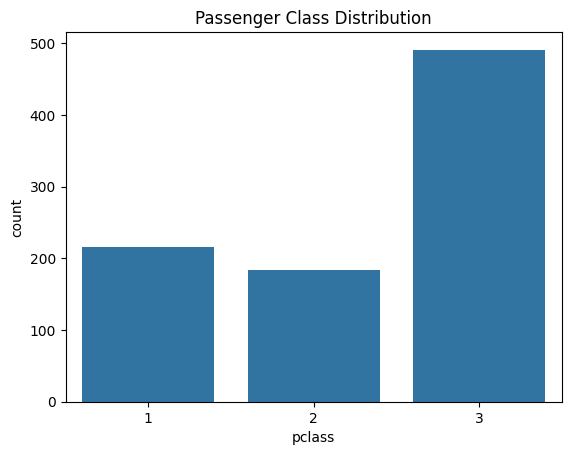

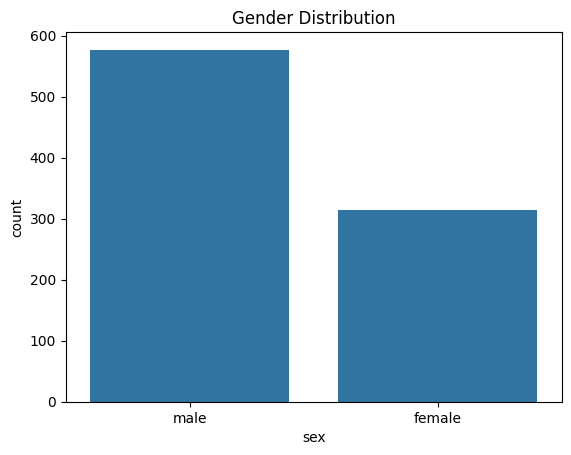

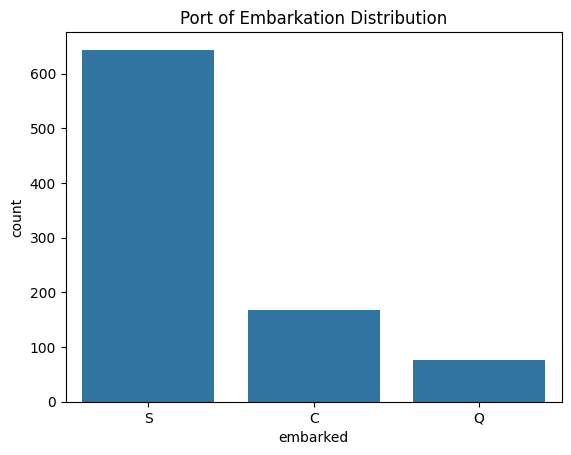

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Pclass
sns.countplot(x='pclass', data=titanic)
plt.title('Passenger Class Distribution')
plt.show()

# Count plot for Sex
sns.countplot(x='sex', data=titanic)
plt.title('Gender Distribution')
plt.show()

# Count plot for Embarked
sns.countplot(x='embarked', data=titanic)
plt.title('Port of Embarkation Distribution')
plt.show()


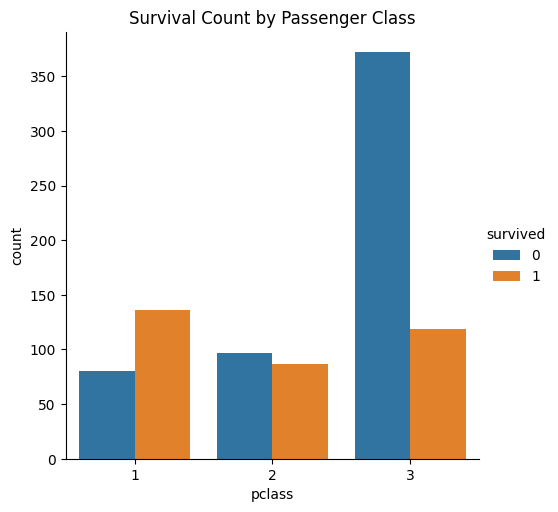

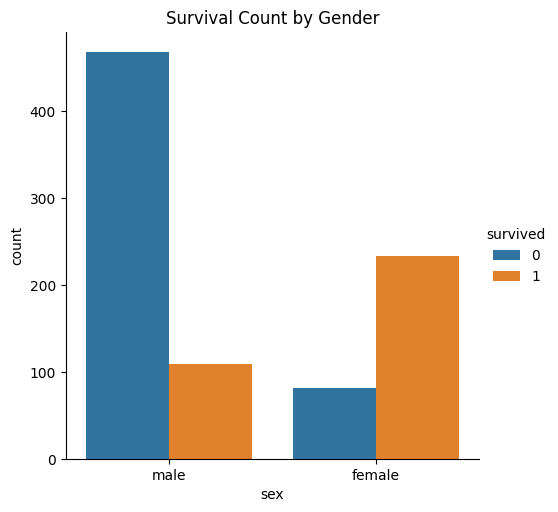

In [41]:
sns.catplot(x="pclass", hue="survived", kind="count", data=titanic)
plt.title("Survival Count by Passenger Class")
plt.show()

sns.catplot(x="sex", hue="survived", kind="count", data=titanic)
plt.title("Survival Count by Gender")
plt.show()


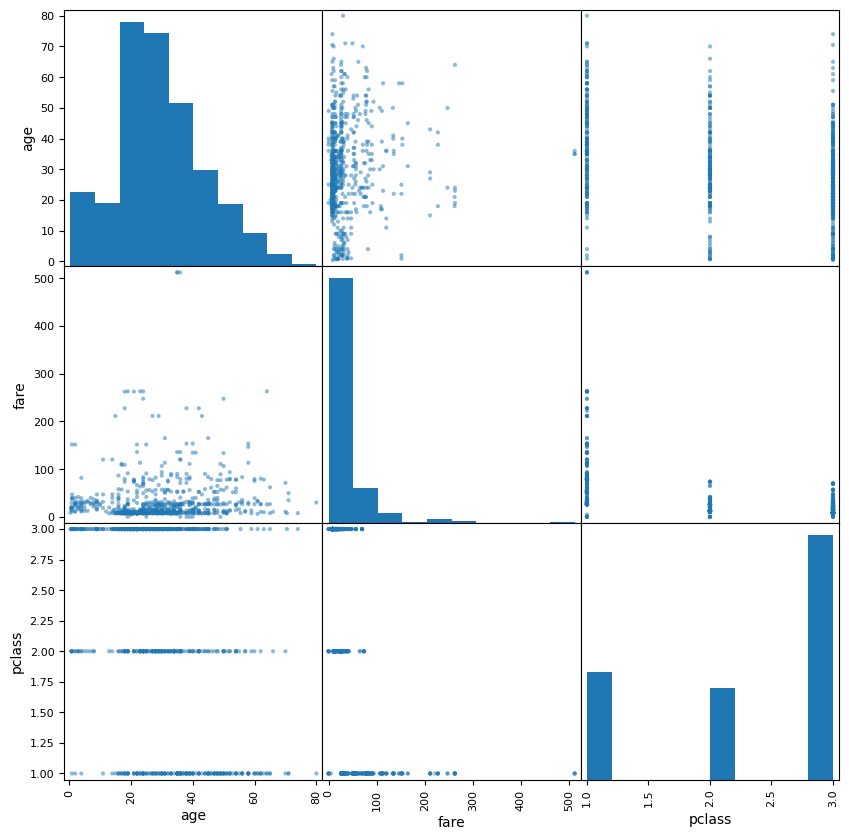

In [42]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))
plt.show()


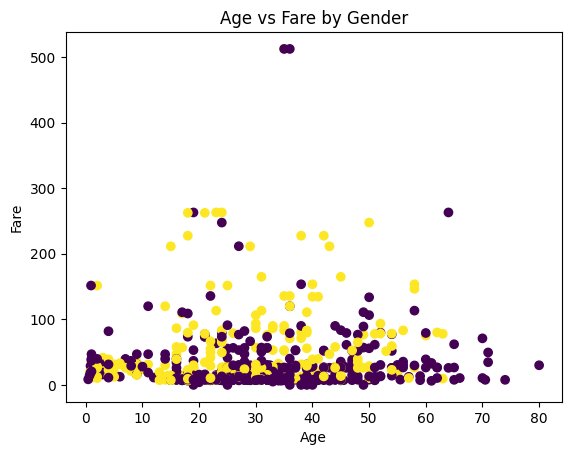

In [43]:
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()


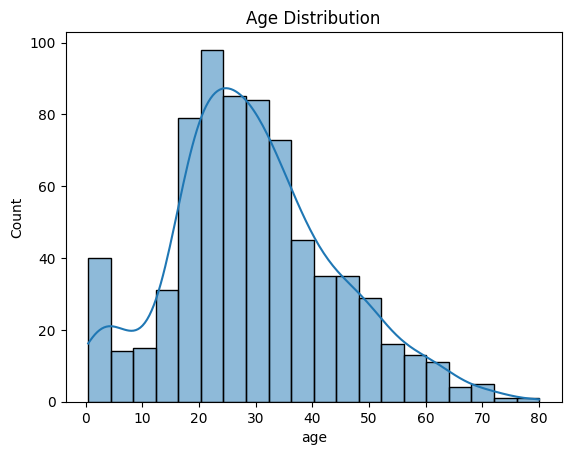

In [44]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()


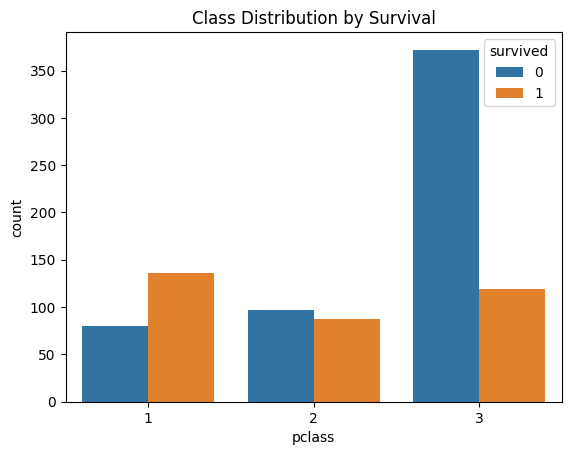

In [45]:
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()


Reflection 2.1
What patterns or anomalies do you notice?

Older passengers tend to have higher fares.
Most passengers were in third class, and survival rates were lowest there.
Do any features stand out as potential predictors?

Passenger class (pclass) and gender (sex) seem highly related to survival.
Are there any visible class imbalances?

Yes, most passengers are from third class, while first-class passengers are fewer.

<Figure size 1200x800 with 0 Axes>

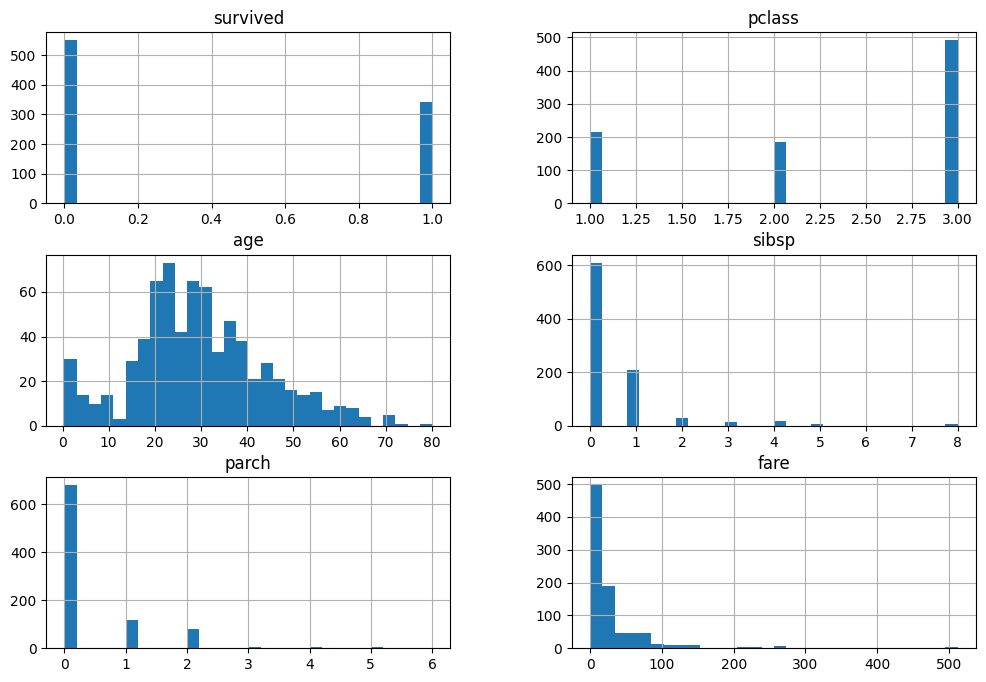

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.suptitle("Histograms for Numeric Features", fontsize=14)

# Generate histograms for numeric features in Titanic dataset
titanic.hist(bins=30, figsize=(12, 8))

plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Generate one Boxenplot for each numeric column
numeric_columns = ['age', 'fare', 'pclass', 'sibsp', 'parch']

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=titanic[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()


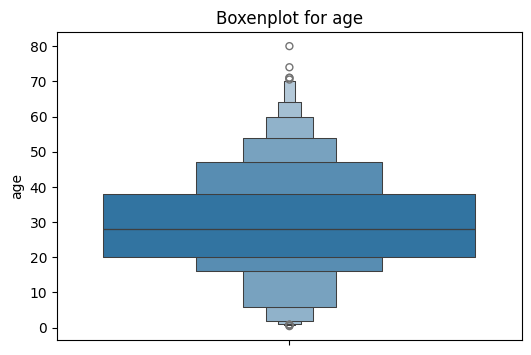

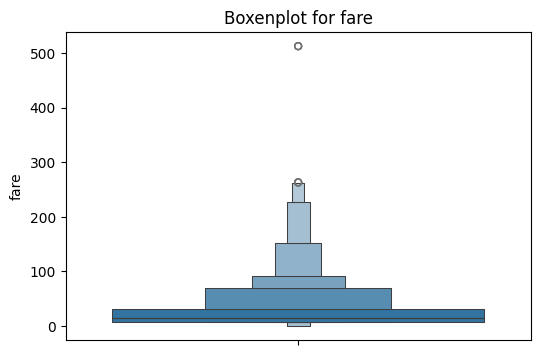

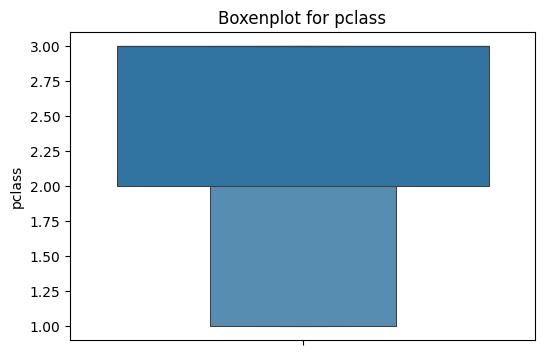

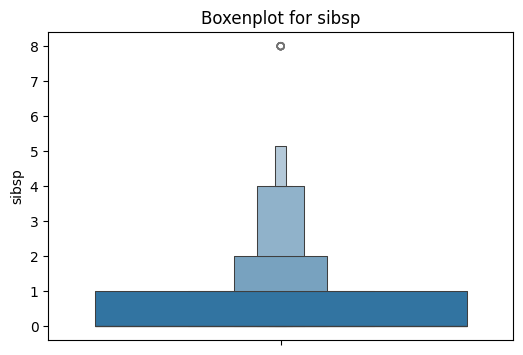

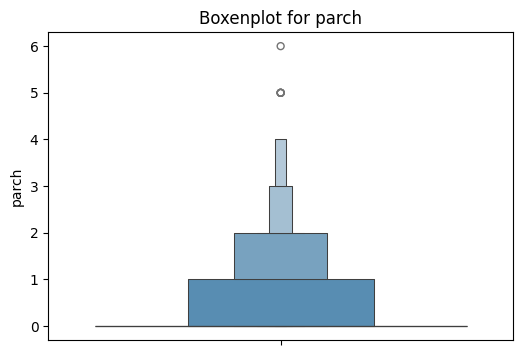

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for Boxenplots
numeric_columns = ['age', 'fare', 'pclass', 'sibsp', 'parch']

# Generate Boxenplots for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=titanic[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatter plots for numeric features (Warning: This may take time)
sns.pairplot(titanic[['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived']])

plt.show()


<Figure size 640x480 with 0 Axes>

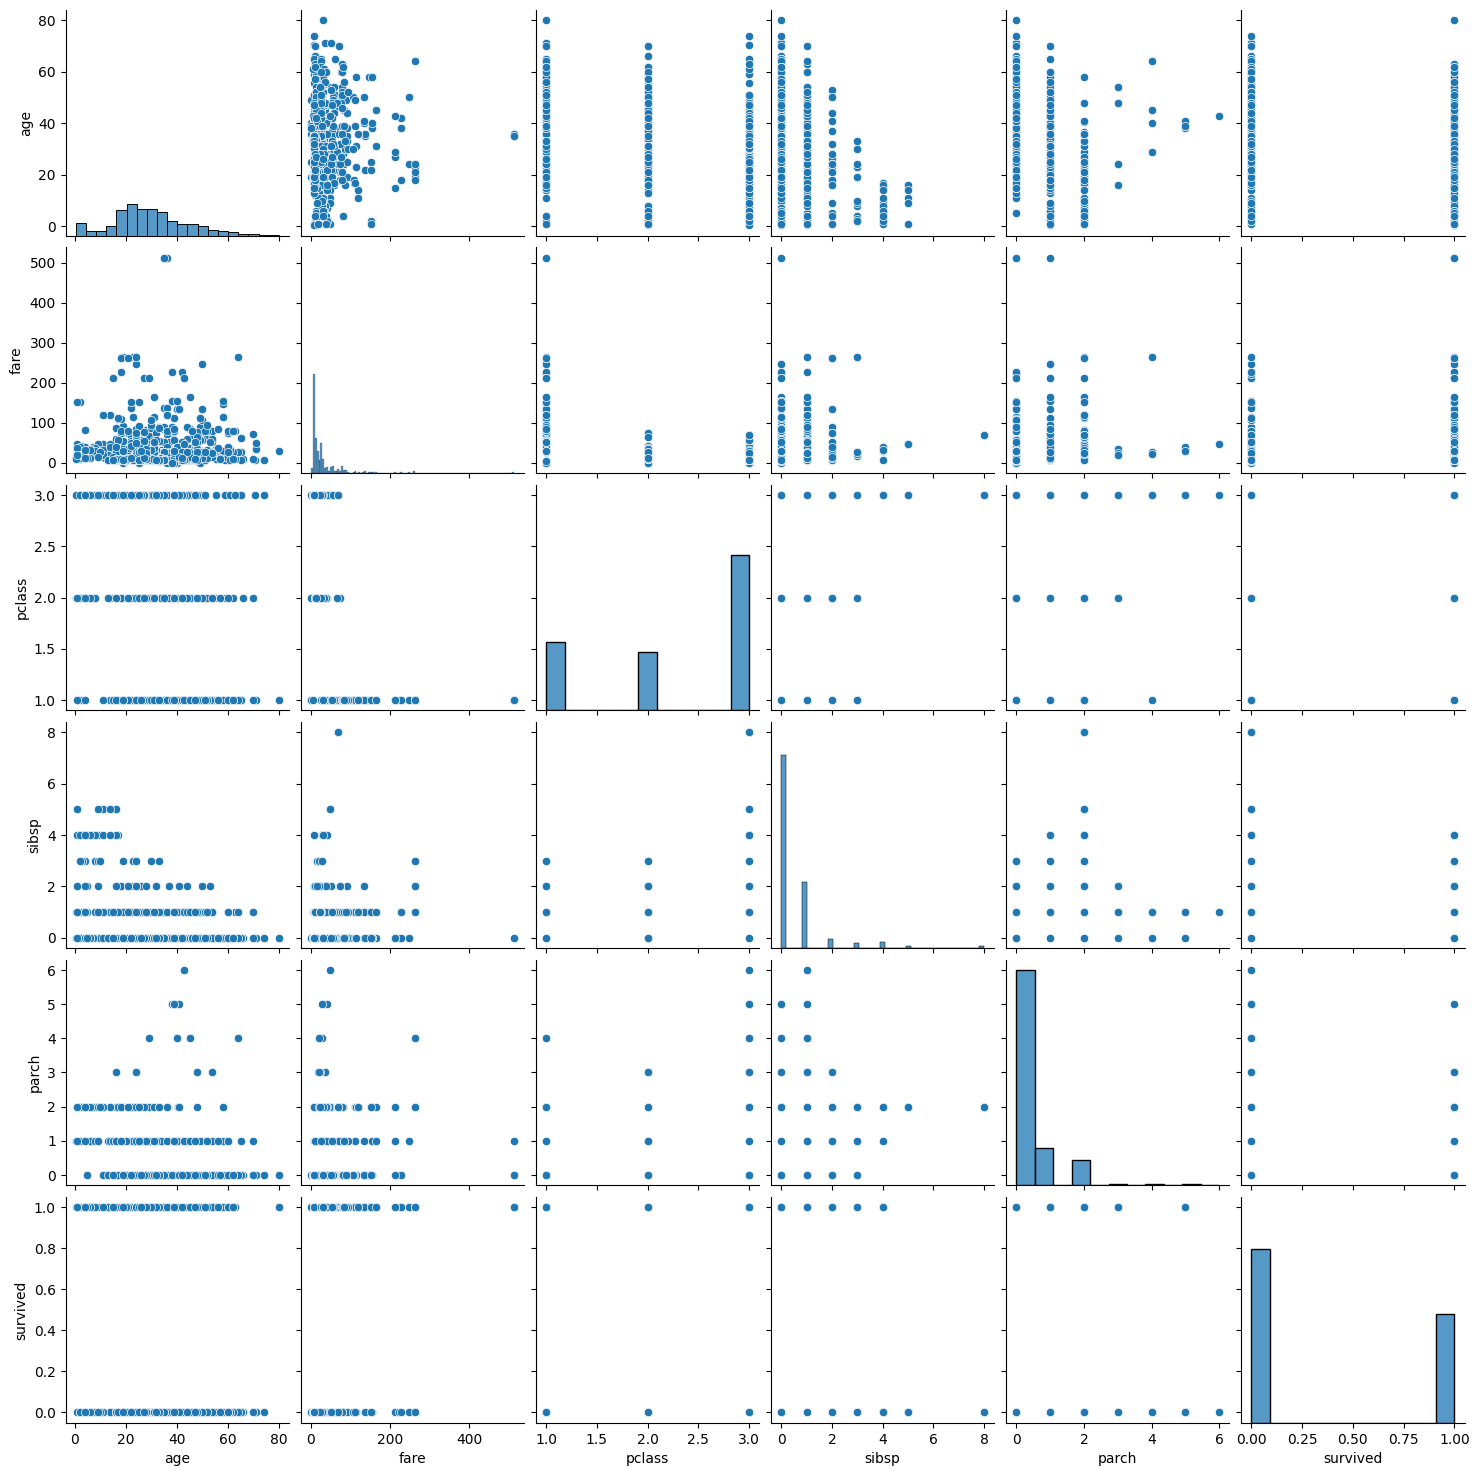

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatter plots using pairplot (this may take time)
plt.suptitle("Scatter Plots for Numeric Features", fontsize=14)
sns.pairplot(titanic[['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived']])

plt.show()


## Section 2.3. Feature Selection and Justification  

### 2.3.1 Choose Input Features for Predicting Survival  

We will select key features that may influence survival:  
- **Predictors (`X`):** `age`, `fare`, `pclass`, `sex`, `family_size`  
- **Target (`y`):** `survived`  

In the following:  
- **`X` is capitalized** because it represents a matrix (consistent with mathematical notation).  
- **`y` is lowercase** because it represents a vector (consistent with mathematical notation).  

### **Example Code:**  
```python
# Define the features (predictors) and target variable
features = ['age', 'fare', 'pclass', 'sex', 'family_size']
target = 'survived'

# Define input (X) and output (y)
X = titanic[features]
y = titanic[target]


In [49]:
# Create 'family_size' feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1


## Reflection 2.3  

### Why might family size be important for survival?  
- People traveling with family may have a better chance of survival because they look out for each other.  
- Those traveling alone might struggle more in a crisis and have a lower survival rate.  

### Why do we convert categorical data to numbers?  
- Machine learning models work with numbers, not text, so we need to convert categories like `sex` and `embarked` into numeric values.  
- This helps the model find patterns and make better predictions.  


## Reflection 3

In [50]:
# Define the selected features (predictors)
features = ['age', 'fare', 'pclass', 'sex', 'family_size']

# Define the target variable (what we want to predict)
target = 'survived'

# Create input (X) and output (y) DataFrames
X = titanic[features]
y = titanic[target]

# Display the first few rows to confirm
X.head(), y.head()


(    age     fare  pclass     sex  family_size
 0  22.0   7.2500       3    male            2
 1  38.0  71.2833       1  female            2
 2  26.0   7.9250       3  female            1
 3  35.0  53.1000       1  female            2
 4  35.0   8.0500       3    male            1,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

## Reflection 3  

### Why did we choose these features?  
- These features help us understand **who had a better chance of survival** on the Titanic.  
- **Age, fare, and passenger class (pclass)** can show patterns in survival rates.  
- **Sex and family size** give insight into how social and family dynamics played a role in survival.  

### Which features are the most important for survival?  
- **Sex** is a major factor—women had a much higher survival rate than men.  
- **Passenger class (pclass)** mattered a lot—first-class passengers had a better chance of survival.  
- **Fare** is linked to class—people who paid more for their tickets were more likely to survive.  


##  Reflection 4  . Train a Logistic Regression Model  
### 4.1 Split the Data  

We will split the dataset into **training (80%) and testing (20%) sets** using `train_test_split()`.  

### **Parameters for train_test_split()**  
- `X` – Feature matrix (input data) as a **pandas DataFrame**  
- `y` – Target values as a **pandas Series**  
- `test_size` – Fraction of data for testing (**0.2 = 20%**)  
- `random_state` – Seed value for reproducibility  

### **Returns:**  
- `X_train` – Training set features (**DataFrame**)  
- `X_test` – Test set features (**DataFrame**)  
- `y_train` – Training set target values (**Series**)  
- `y_test` – Test set target values (**Series**)  

### **Example Code:**  
```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 5), (179, 5), (712,), (179,))

### 4.2 Train the Model  

**LogisticRegression** – A class from `sklearn.linear_model` that creates a logistic regression model.

- `model` – An instance of the `LogisticRegression` model. This object will store the learned coefficients and intercept after training.
- `fit()` – Trains the model using the **logistic function**, which predicts probabilities for classification.
- `X_train` – The input features used to train the model.
- `y_train` – The target values used to train the model.

### **Example Code:**
```python
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


In [52]:
X_train = X_train.copy()
X_test = X_test.copy()

X_train = X_train.assign(age=X_train['age'].fillna(X_train['age'].median()))
X_test = X_test.assign(age=X_test['age'].fillna(X_test['age'].median()))


In [53]:
# Convert 'sex' to numeric in X_train and X_test
X_train['sex'] = X_train['sex'].map({'male': 0, 'female': 1})
X_test['sex'] = X_test['sex'].map({'male': 0, 'female': 1})


In [55]:
# Convert 'sex' to numeric BEFORE splitting
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

In [56]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check missing values again
print("Missing values in X_train['sex']:", X_train['sex'].isnull().sum())
print("Missing values in X_test['sex']:", X_test['sex'].isnull().sum())


Missing values in X_train['sex']: 0
Missing values in X_test['sex']: 0


In [57]:
# Convert 'sex' to numeric in X_train and X_test
X_train['sex'] = X_train['sex'].map({'male': 0, 'female': 1})
X_test['sex'] = X_test['sex'].map({'male': 0, 'female': 1})

# Verify that 'sex' is now numeric
print(X_train.dtypes)
print(X_test.dtypes)


age            float64
fare           float64
pclass           int64
sex              int64
family_size      int64
dtype: object
age            float64
fare           float64
pclass           int64
sex              int64
family_size      int64
dtype: object


In [58]:
X_train = X_train.copy()
X_test = X_test.copy()

X_train['age'] = X_train['age'].fillna(X_train['age'].median())
X_test['age'] = X_test['age'].fillna(X_test['age'].median())

# Confirm missing values are gone
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in X_test:\n", X_test.isnull().sum())


Missing values in X_train:
 age            0
fare           0
pclass         0
sex            0
family_size    0
dtype: int64
Missing values in X_test:
 age            0
fare           0
pclass         0
sex            0
family_size    0
dtype: int64


In [59]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [60]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.800561797752809
Test Accuracy: 0.8044692737430168


In [61]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[92 13]
 [22 52]]


In [62]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Make Predictions for the Test Set  

The `model.predict()` method applies the logistic regression model to `X_test` to generate predicted survival outcomes.  

### **Example Code:**
```python
# Make predictions using the test set
y_pred = model.predict(X_test)

# Display the first 5 actual vs predicted values
import pandas as pd
results = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': y_pred[:5]})
results


In [63]:

# Make predictions using the test set
y_pred = model.predict(X_test)

# Display the first 5 actual vs predicted values
import pandas as pd
results = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': y_pred[:5]})
results


,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1


In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create the stratified splitter
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))


Train size: 712
Test size: 179


In [65]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))


Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


## Reflection 4  

### Why does stratification help the model?  
- Stratification makes sure that the **training and test sets have the same class distribution** as the original dataset.  
- This prevents the model from being biased toward one group just because it got more of those examples in training.  

### How close are the training and test distributions to the original dataset?  
- The **original survival rate** was about **62% did not survive, and 38% survived**.  
- The **stratified split keeps these proportions nearly the same**, so the test set looks more like real-world data.  

### Which split method worked better?  
- **StratifiedShuffleSplit** did a better job of keeping the balance compared to `train_test_split()`.  
- A normal train-test split can **randomly overrepresent certain groups**, which might make the model unfair or inaccurate.  


## 5 Evaluate Model Performance  

Since this is a **classification model**, we evaluate it using:  
- **Accuracy** → Overall correctness of predictions  
- **Precision, Recall, F1-score** → Measures model performance for each class  
- **Confusion Matrix** → Shows correct vs. incorrect predictions  

### **Example Code:**  
```python
from sklearn.metrics import accuracy_score, classification_report

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [66]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

